# Dataset plotting presentation
Tasks:
1. Read the dataset
2. Drop duplicates
3. Drop null values consisting of corresponding rows/columns
4. Replace null values with zero/mean/median/mode
5. Scatter plot with and without hue
6. KDE plot with and without hue
7. Histogram with and without hue
8. Boxplot of all the features
9. Detect outliers with boxplot

### 1. Read the dataset

In [64]:
# import pandas
import pandas as pd

In [65]:
#Read the dataset and store it in a dataframe
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

### Basic Stats

In [66]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  614
Number of columns:  13


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 2. Drop duplicates

In [68]:
df.Loan_ID.duplicated().sum() #check duplicate for Loan_ID column

0

In [69]:
df.duplicated().sum()

0

In [70]:
df1 = df.drop(columns=['Loan_ID'])
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 3. Drop null values consisting of corresponding rows/columns

In [71]:
df1.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 4. Replace null values with zero/mean/median/mode

In [72]:
df1_mode = df1
df1_mode['Gender'] = df1['Gender'].fillna(df1['Gender'].mode()[0])
df1_mode['Married'] = df1['Married'].fillna(df1['Married'].mode()[0])
df1_mode['Dependents'] = df1['Dependents'].fillna(df1['Dependents'].mode()[0])
df1_mode['Self_Employed'] = df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])
df1_mode['Credit_History'] = df1['Credit_History'].fillna(df1['Credit_History'].mode()[0])
df1_mode.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [73]:
df1_mode_median = df1_mode
df1_mode_median['LoanAmount'] = df1_mode['LoanAmount'].fillna(df1_mode['LoanAmount'].median())
df1_mode_median['Loan_Amount_Term'] = df1_mode['Loan_Amount_Term'].fillna(df1_mode['Loan_Amount_Term'].median())
df1_mode_median.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 5. Scatter plot with and without hue

In [74]:
import seaborn as sns
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

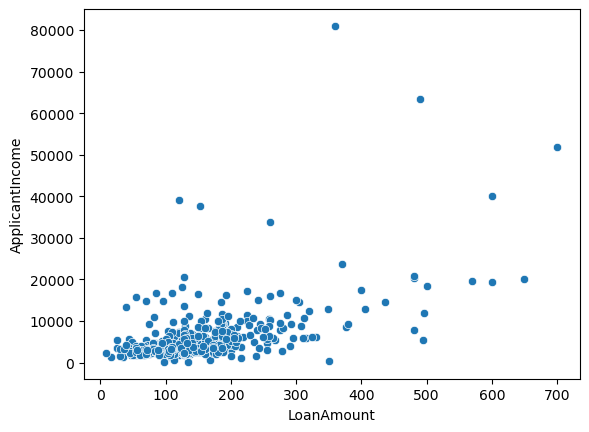

In [75]:
df1_plot = df1_mode_median
sns.scatterplot(data=df1_plot, y='ApplicantIncome', x='LoanAmount')

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

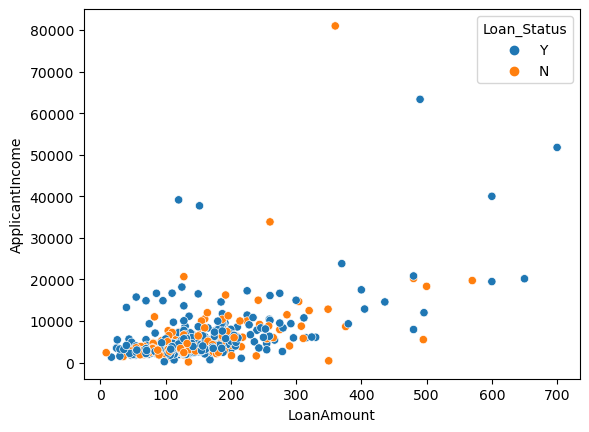

In [76]:
sns.scatterplot(data=df1_plot,y='ApplicantIncome',x='LoanAmount', hue='Loan_Status')

### 6. KDE plot with and without hue

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

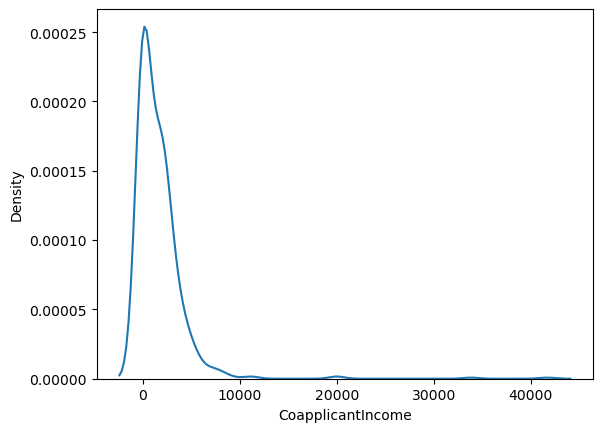

In [77]:
sns.kdeplot(x = 'CoapplicantIncome', data = df1_plot)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

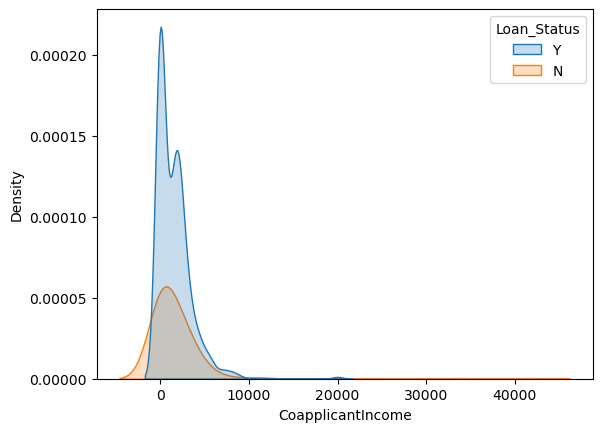

In [78]:
sns.kdeplot(x = 'CoapplicantIncome', data = df1_plot, shade = True, hue = 'Loan_Status')

### 7. Histogram with and without hue

In [79]:
df1_plot['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

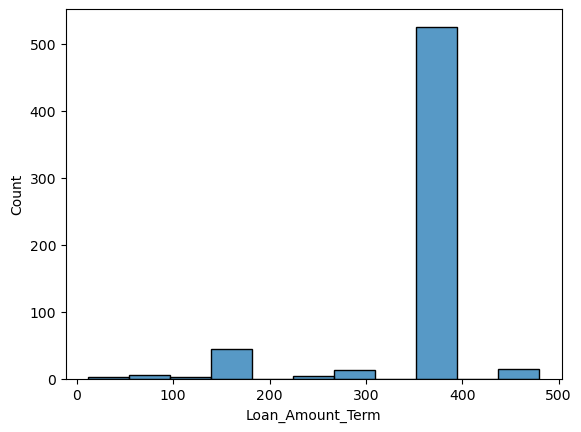

In [80]:
sns.histplot(x = 'Loan_Amount_Term', data = df1_plot);

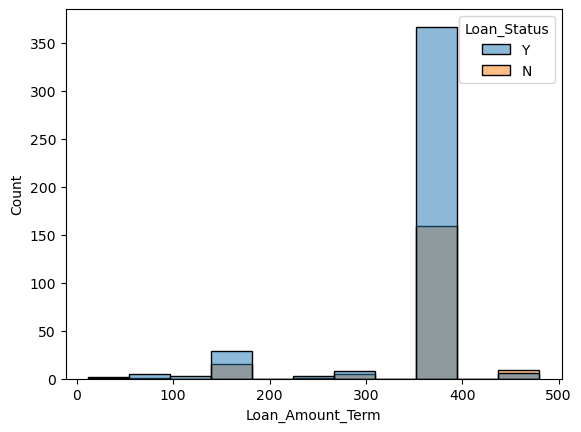

In [81]:
sns.histplot(x = 'Loan_Amount_Term', data = df1_plot, hue='Loan_Status');

### 8. Boxplot of all the features

<AxesSubplot:xlabel='LoanAmount', ylabel='Gender'>

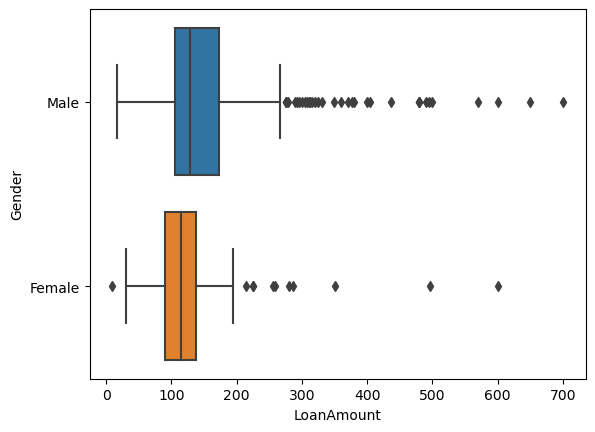

In [93]:
sns.boxplot(x= 'LoanAmount', y = 'Gender', data = df1_plot)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Married'>

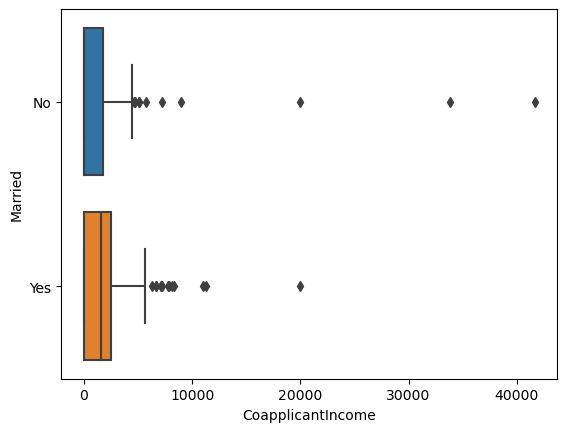

In [94]:
sns.boxplot(x= 'CoapplicantIncome', y = 'Married', data = df1_plot)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Dependents'>

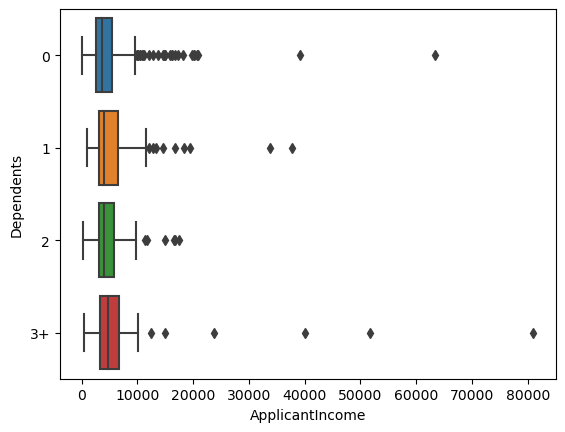

In [84]:
sns.boxplot(x= 'ApplicantIncome', y = 'Dependents', data = df1_plot)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Self_Employed'>

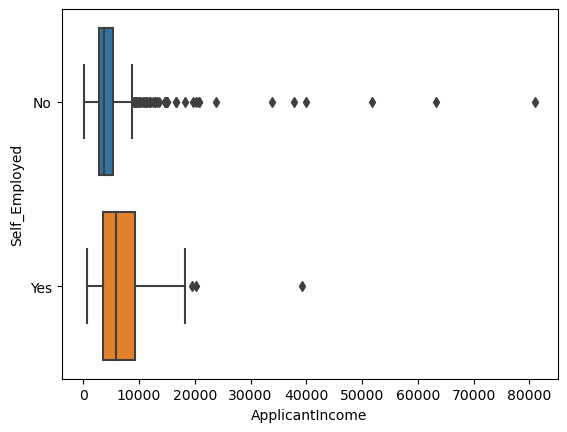

In [97]:
sns.boxplot(x= 'ApplicantIncome', y = 'Self_Employed', data = df1_plot)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Credit_History'>

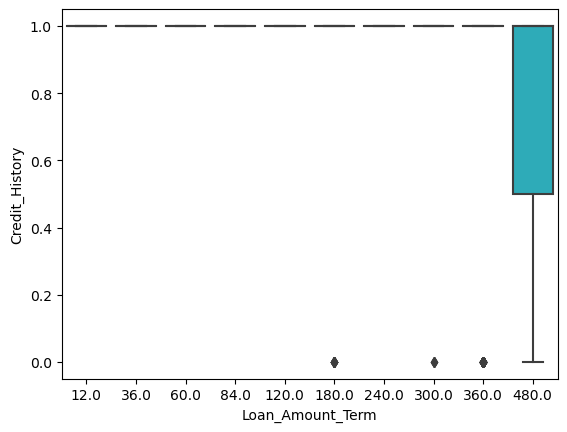

In [96]:
sns.boxplot(x= 'Loan_Amount_Term', y = 'Credit_History', data = df1_plot)

### 9. Detect outliers with boxplot

In [87]:
# implementation of the Tukey's algorithm
# values that look different from the other values in the data
# Box plots are a visual method to identify outliers
def findOutliers(dataset):
    outliers = []
    Q2 = dataset.median()
    Q1 = dataset.describe()[4]
    Q3 = dataset.describe()[6]
    
    Q1 = dataset.quantile(0.25)
    Q3 = dataset.quantile(0.75)
    
    IQR = Q3 - Q1
    lf = Q1 - 1.5*IQR # lf = lower fence
    uf = Q3 + 1.5*IQR # Uf = Upper fence
    for x in dataset:
        if x < lf or x > uf:
            outliers.append(x)
    return outliers

In [88]:
df1_plot.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


[12841,
 12500,
 11500,
 10750,
 13650,
 11417,
 14583,
 10408,
 23803,
 10513,
 20166,
 14999,
 11757,
 14866,
 39999,
 51763,
 33846,
 39147,
 12000,
 11000,
 16250,
 14683,
 11146,
 14583,
 20667,
 20233,
 15000,
 63337,
 19730,
 15759,
 81000,
 14880,
 12876,
 10416,
 37719,
 16692,
 16525,
 16667,
 10833,
 18333,
 17263,
 20833,
 13262,
 17500,
 11250,
 18165,
 19484,
 16666,
 16120,
 12000]

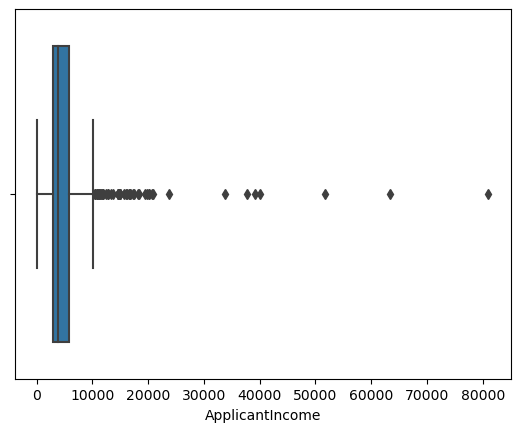

In [99]:
sns.boxplot(x = 'ApplicantIncome', data = df1_plot)
findOutliers(df1_plot['ApplicantIncome'])

[10968.0,
 8106.0,
 7210.0,
 8980.0,
 7750.0,
 11300.0,
 7250.0,
 7101.0,
 6250.0,
 7873.0,
 20000.0,
 20000.0,
 8333.0,
 6667.0,
 6666.0,
 7166.0,
 33837.0,
 41667.0]

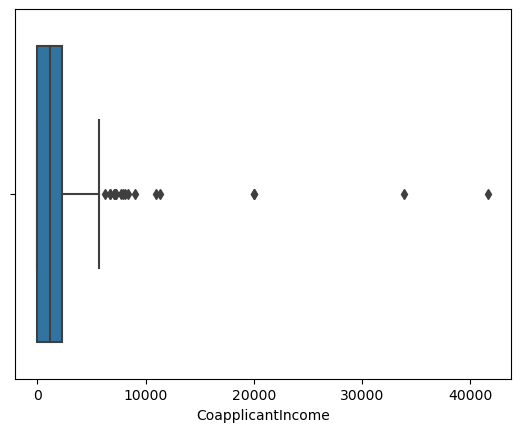

In [90]:
sns.boxplot(x = 'CoapplicantIncome', data = df1_plot)
findOutliers(df1_plot['CoapplicantIncome'])

[267.0,
 349.0,
 315.0,
 320.0,
 286.0,
 312.0,
 265.0,
 370.0,
 650.0,
 290.0,
 600.0,
 275.0,
 700.0,
 495.0,
 280.0,
 279.0,
 304.0,
 330.0,
 436.0,
 480.0,
 300.0,
 376.0,
 490.0,
 308.0,
 570.0,
 380.0,
 296.0,
 275.0,
 360.0,
 405.0,
 500.0,
 480.0,
 311.0,
 480.0,
 400.0,
 324.0,
 600.0,
 275.0,
 292.0,
 350.0,
 496.0]

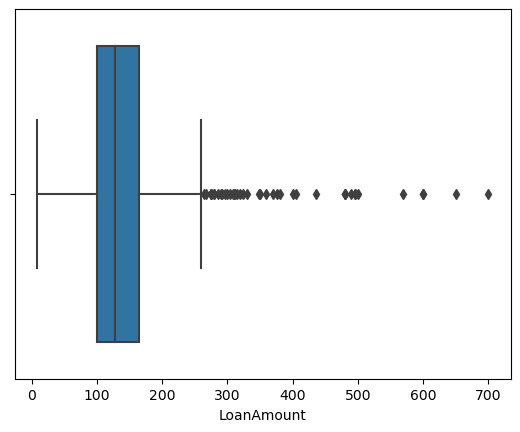

In [91]:
sns.boxplot(x = 'LoanAmount', data = df1_plot)
findOutliers(df1_plot['LoanAmount'])

[120.0,
 240.0,
 180.0,
 180.0,
 60.0,
 300.0,
 480.0,
 300.0,
 240.0,
 180.0,
 120.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 480.0,
 120.0,
 180.0,
 180.0,
 180.0,
 180.0,
 480.0,
 300.0,
 180.0,
 480.0,
 180.0,
 300.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 60.0,
 180.0,
 180.0,
 480.0,
 180.0,
 36.0,
 180.0,
 300.0,
 480.0,
 480.0,
 84.0,
 180.0,
 180.0,
 180.0,
 180.0,
 480.0,
 300.0,
 480.0,
 300.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 180.0,
 300.0,
 300.0,
 180.0,
 240.0,
 300.0,
 300.0,
 180.0,
 180.0,
 180.0,
 180.0,
 300.0,
 84.0,
 12.0,
 480.0,
 300.0,
 180.0,
 480.0,
 180.0,
 180.0,
 36.0,
 180.0,
 480.0,
 84.0,
 84.0,
 180.0,
 240.0,
 180.0,
 180.0,
 180.0,
 180.0]

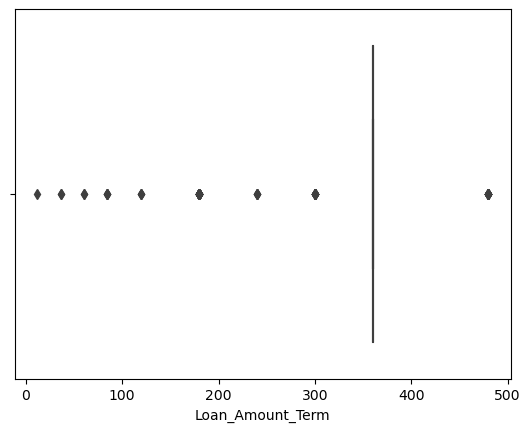

In [92]:
sns.boxplot(x = 'Loan_Amount_Term', data = df1_plot)
findOutliers(df1_plot['Loan_Amount_Term'])